In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
df = pd.read_csv("Mall_Customers.csv")


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Data preprocessing

In [ ]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]


Scale the data

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


Apply K-means

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

Add cluster labels to the original dataset

In [ ]:

df['Cluster'] = kmeans.labels_

Visualize the clusters

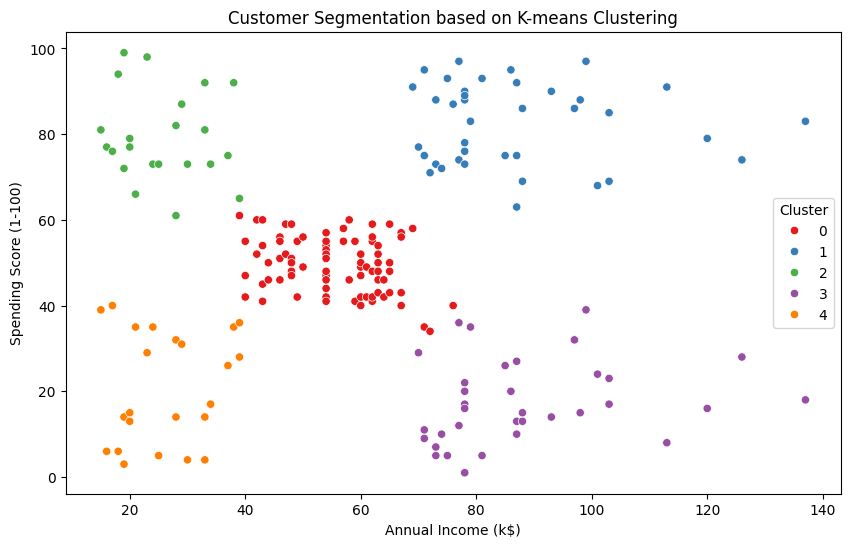

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segmentation based on K-means Clustering')
plt.show()

Elbow method to determine the optimal number of clusters

In [22]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)  # n_init is explicitly set
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

Plot the Elbow graph

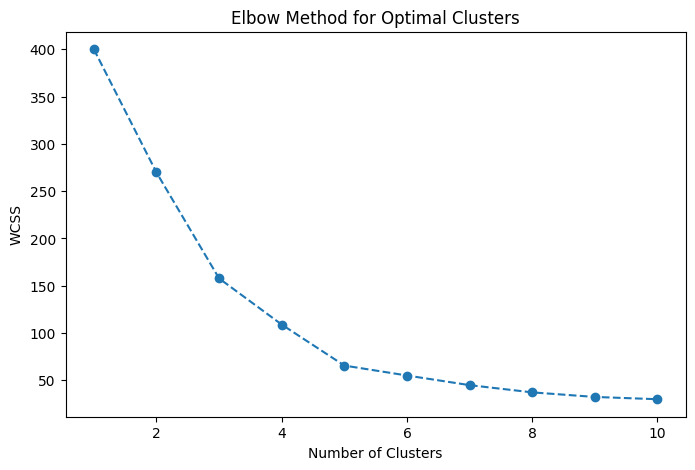

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Apply K-means with the optimal number of clusters and set n_init explicitly

In [24]:
optimal_clusters = 5  # Assuming from the Elbow method result
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)



 Analyze the characteristics of each cluster (e.g., average income, spending score

In [25]:
cluster_analysis = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean() # Use a list to select multiple columns
print(cluster_analysis)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
